In [114]:
import nideconv

In [115]:
import glob
import re

reg = re.compile('.*/(?P<ds>ds-[0-9]+)/.*/sub-(?P<subject>[0-9]+)_task-randomdotmotion_run-(?P<run>[0-9]+)_space-T1w_desc-preproc_desc-(?P<mask>.+).csv')

In [116]:
fns = glob.glob('/data/bias_task/derivatives/ds-*/extracted_signal/sub-*/func/*.csv')

In [117]:
import pandas as pd

In [118]:
df = []

for fn in fns:
    
    d = pd.read_csv(fn, index_col=0).mean(1).to_frame('signal')
    meta = reg.match(fn).groupdict()
    
    for key in meta:
        d[key] = meta[key]
        
    d.index.name = 'frame'
    d.reset_index()
    d['subject'] = d.apply(lambda row: '{ds}.{subject}'.format(**row.to_dict()), 1)
    d.drop('ds', 1, inplace=True)
    df.append(d)
    
df = pd.concat(df)
df = df.pivot_table(index=['subject', 'run', 'frame'], columns='mask', values='signal')

In [119]:
reg = re.compile('.*/(?P<ds>ds-[0-9]+)/.*/sub-(?P<subject>[0-9]+)_task-randomdotmotion_run-(?P<run>[0-9]+)_events.tsv')

In [120]:
events = []
for fn in glob.glob('/data/bias_task/derivatives/ds-*/event_files/*.tsv'):
    meta = reg.match(fn).groupdict()
    
    d = pd.read_table(fn)
    
    for key in meta:
        d[key] = meta[key]
    
    d['subject'] = d.apply(lambda row: '{ds}.{subject}'.format(**row.to_dict()), 1)
    d.drop('ds', 1, inplace=True)
    events.append(d.copy())

events = pd.concat(events)

/Users/gilles/miniconda3/envs/nideconv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """


In [121]:
reg = re.compile('.*/(?P<ds>ds-[0-9]+)/.*/sub-(?P<subject>[0-9]+)_task-randomdotmotion_run-(?P<run>[0-9]+)_desc-confounds_regressors.tsv')

In [122]:
fns = glob.glob('/data/bias_task/derivatives/ds-*/fmriprep_confounds/sub-*_task-randomdotmotion_run-*_desc-confounds_regressors.tsv')

In [10]:
confounds = []
for fn in fns:
    meta = reg.match(fn).groupdict()
    d = pd.read_table(fn)
    
    for key in meta:
        d[key] = meta[key]
        
    d['subject'] = d.apply(lambda row: '{ds}.{subject}'.format(**row.to_dict()), 1)
    d.drop('ds', 1, inplace=True)        
        
    confounds.append(d)
    
confounds = pd.concat(confounds)

confounds = confounds.set_index(['subject', 'run'])

/Users/gilles/miniconda3/envs/nideconv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.
/Users/gilles/miniconda3/envs/nideconv/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [18]:
include_confounds = include = [u'dvars',u'framewise_displacement', u'a_comp_cor_00', u'a_comp_cor_01', u'a_comp_cor_02', u'a_comp_cor_03', u'a_comp_cor_04', u'a_comp_cor_05', u'cosine00', u'cosine01', u'cosine02', u'cosine03', u'cosine04', u'cosine05', u'cosine06', u'cosine07', u'cosine08', u'cosine09', u'cosine10', u'cosine11', u'cosine12', u'cosine13', u'cosine14', u'cosine15']#, u'trans_x', u'trans_y', u'trans_z', u'rot_x', u'rot_y', u'rot_z']

In [12]:
events['original_onset'] = events['onset'].copy()

In [13]:
events['onset'] = events['original_onset'] - 3.0

In [22]:
events_ = events.copy()
events_ = events_[events_.trial_type.isin(['cue_left', 'cue_right', 'cue_neutral'])]
events_['trial_type'] = 'cue'

In [23]:
gf = nideconv.GroupResponseFitter(df, events_, 1/3., confounds=confounds[include_confounds].reset_index())
# gf.add_event('hard', interval=[0, 12], basis_set='fourier', n_regressors=7)
# gf.add_event('easy', interval=[0, 12], basis_set='fourier', n_regressors=7)
# gf.add_event('error', interval=[0, 12], basis_set='fourier', n_regressors=7)

# gf.add_event('cue_neutral', interval=[0, 20], basis_set='fourier', n_regressors=9)
# gf.add_event('cue_left', interval=[0, 20], basis_set='fourier', n_regressors=9)
# gf.add_event('cue_right', interval=[0, 20], basis_set='fourier', n_regressors=9)

gf.add_event('cue', interval=[0, 20], basis_set='fourier', n_regressors=9)
# gf.add_event('cue_left', interval=[0, 20], basis_set='fourier', n_regressors=9)
# gf.add_event('cue_right', interval=[0, 20], basis_set='fourier', n_regressors=9)


# gf.add_event('response_left', interval=[0, 12], basis_set='fourier', n_regressors=5)
# gf.add_event('response_right', interval=[0, 12], basis_set='fourier', n_regressors=5)

/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users

/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users

/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users/gilles/git/nideconv/nideconv/regressors.py:231: UserWarning: 
Interval is now automatically set to [ 0. 18.].
  warnings.warn(warning)
/Users

In [24]:
gf.fit()

In [25]:
import seaborn as sns

/Users/gilles/miniconda3/envs/nideconv/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/envs/nideconv/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


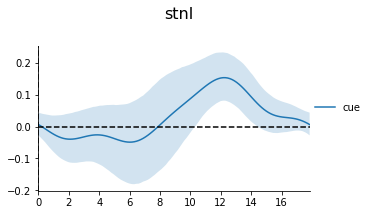

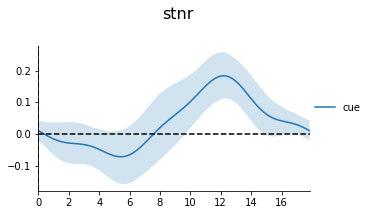

In [27]:
gf.plot_groupwise_timecourses(event_types=['cue'], ci=95)

/Users/gilles/miniconda3/envs/nideconv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2843: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/Users/gilles/git/nideconv/nideconv/regressors.py:268: UserWarning: Number of fourier regressors has to be uneven and has automatically been set to 13 per covariate
  'been set to {} per covariate'.format(self.basis_set, self.n_regressors))


subject   run
ds-01.01  01     <nideconv.response_fitter.ResponseFitter objec...
          02     <nideconv.response_fitter.ResponseFitter objec...
          03     <nideconv.response_fitter.ResponseFitter objec...
ds-01.02  01     <nideconv.response_fitter.ResponseFitter objec...
          02     <nideconv.response_fitter.ResponseFitter objec...
          03     <nideconv.response_fitter.ResponseFitter objec...
ds-01.03  01     <nideconv.response_fitter.ResponseFitter objec...
          02     <nideconv.response_fitter.ResponseFitter objec...
          03     <nideconv.response_fitter.ResponseFitter objec...
ds-01.04  01     <nideconv.response_fitter.ResponseFitter objec...
          02     <nideconv.response_fitter.ResponseFitter objec...
          03     <nideconv.response_fitter.ResponseFitter objec...
ds-01.05  01     <nideconv.response_fitter.ResponseFitter objec...
          02     <nideconv.response_fitter.ResponseFitter objec...
          03     <nideconv.response_fitter.Respo

/Users/gilles/miniconda3/envs/nideconv/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


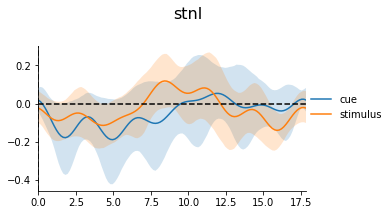

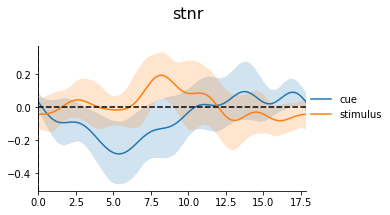

In [71]:
events_ = events.copy()
events_.loc[events_.trial_type.isin(['cue_left', 'cue_right', 'cue_neutral']), 'trial_type'] = 'cue'
events_.loc[events_.trial_type.isin(['easy', 'hard']), 'trial_type'] = 'stimulus'
events_ = events_[events_.trial_type.isin(['cue', 'stimulus'])]

gf = nideconv.GroupResponseFitter(df.loc[df.index.get_level_values('subject').unique()[:19]], events_, 1/3., confounds=confounds[include_confounds].reset_index())
gf.add_event('cue', interval=[0, 18], basis_set='fourier', n_regressors=12)
gf.add_event('stimulus', interval=[0, 18], basis_set='fourier', n_regressors=12)

print(gf.response_fitters)
gf.fit()
gf.plot_groupwise_timecourses(event_types=['cue', 'stimulus'], ci=95)

subject   run
ds-02.01  01     <nideconv.response_fitter.ResponseFitter objec...
          02     <nideconv.response_fitter.ResponseFitter objec...
          03     <nideconv.response_fitter.ResponseFitter objec...
ds-02.02  01     <nideconv.response_fitter.ResponseFitter objec...
          02     <nideconv.response_fitter.ResponseFitter objec...
          03     <nideconv.response_fitter.ResponseFitter objec...
ds-02.03  01     <nideconv.response_fitter.ResponseFitter objec...
          02     <nideconv.response_fitter.ResponseFitter objec...
          03     <nideconv.response_fitter.ResponseFitter objec...
ds-02.05  01     <nideconv.response_fitter.ResponseFitter objec...
          02     <nideconv.response_fitter.ResponseFitter objec...
          03     <nideconv.response_fitter.ResponseFitter objec...
ds-02.06  01     <nideconv.response_fitter.ResponseFitter objec...
          02     <nideconv.response_fitter.ResponseFitter objec...
          03     <nideconv.response_fitter.Respo

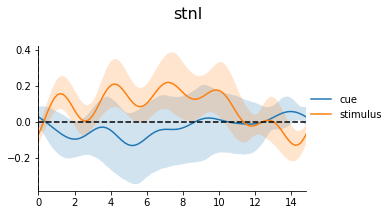

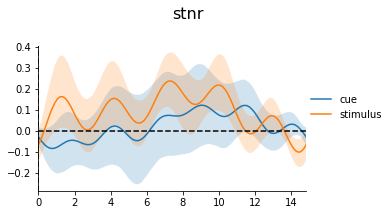

In [77]:
gf = nideconv.GroupResponseFitter(df.loc[df.index.get_level_values('subject').unique()[19:]], events_, 1/3., confounds=confounds[include_confounds].reset_index())
gf.add_event('cue', interval=[0, 15], basis_set='fourier', n_regressors=13)
gf.add_event('stimulus', interval=[0, 15], basis_set='fourier', n_regressors=13)
print(gf.response_fitters)
gf.fit()
gf.plot_groupwise_timecourses(event_types=['cue', 'stimulus'], ci=95)

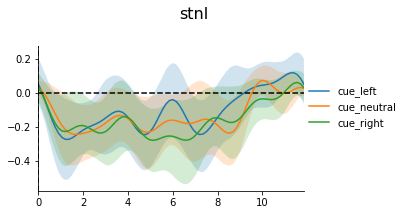

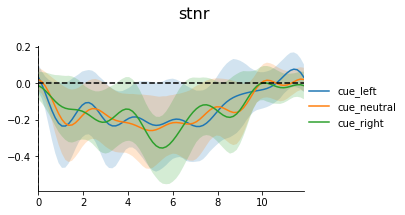

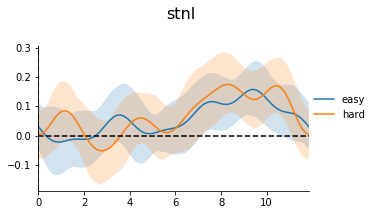

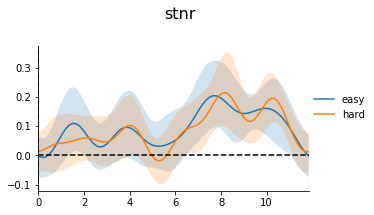

In [47]:
events['duration'] = 0.1

gf = nideconv.GroupResponseFitter(df, events, 1/3., confounds=confounds[include_confounds].reset_index())
gf.add_event('cue_left', interval=[0, 12], basis_set='fourier', n_regressors=12)
gf.add_event('cue_right', interval=[0, 12], basis_set='fourier', n_regressors=12)
gf.add_event('cue_neutral', interval=[0, 12], basis_set='fourier', n_regressors=12)

gf.add_event('hard', interval=[0, 12], basis_set='fourier', n_regressors=12)
gf.add_event('easy', interval=[0, 12], basis_set='fourier', n_regressors=12)

gf.fit()
gf.plot_groupwise_timecourses(event_types=['cue_left', 'cue_right', 'cue_neutral'], ci=95)

gf.plot_groupwise_timecourses(event_types=['hard', 'easy'], ci=95)

In [109]:
import nistats

In [110]:
from nistats.design_matrix import make_first_level_design_matrix

In [111]:
events['duration'] = None

In [112]:
from nistats.first_level_model import run_glm


In [123]:
from statsmodels.tsa.ar_model import AR

In [124]:
import statsmodels.api as sm

In [125]:
import numpy as np

In [163]:
from nistats.contrasts import compute_contrast
from nistats.first_level_model import run_glm
from nistats.design_matrix import make_first_level_design_matrix

In [164]:
results = []

contrasts = ['cue_left', 'cue_right', 'cue_neutral', 'hard', 'easy', 'error']
for (subject, run), e in events.groupby(['subject', 'run']):
    
    c = confounds.loc[(subject, run), include_confounds]
    c = c.fillna(method='bfill')
    
    
    e = e[e.trial_type.isin(contrasts)]
    e['duration'] = .1
    frame_times = df.loc[subject, run].index.get_level_values('frame') * 3
    X = make_first_level_design_matrix(frame_times, e, drift_order=None, drift_model=None, add_regs=c.values, add_reg_names=include_confounds,
                                      hrf_model='glover')
    
    labels, estimates = run_glm(df.loc[subject, run].values, X.values)
    
    contrast_matrix = np.eye(X.shape[1])
    basic_contrasts = dict([(column, contrast_matrix[i]) for i, column in enumerate(X.columns)])
    
#     r = sm.OLS(df.loc[(subject, run), 'stnr'].values, X).fit()
    
    for contrast in contrasts:
        d = dict(zip(df.columns, compute_contrast(labels, estimates, basic_contrasts[contrast], contrast_type='t').effect_size()))
        d['subject'] = subject
        d['run'] = run
        d['contrast'] = contrast        
        results.append(d)


/Users/gilles/miniconda3/envs/nideconv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [165]:
results = pd.DataFrame(results)

In [166]:
results = results.melt(id_vars=['subject', 'run', 'contrast'], var_name='mask')

In [167]:
results['dataset'] = results.subject.apply(lambda row: row[:5])

In [168]:
import seaborn as sns

/Users/gilles/miniconda3/envs/nideconv/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


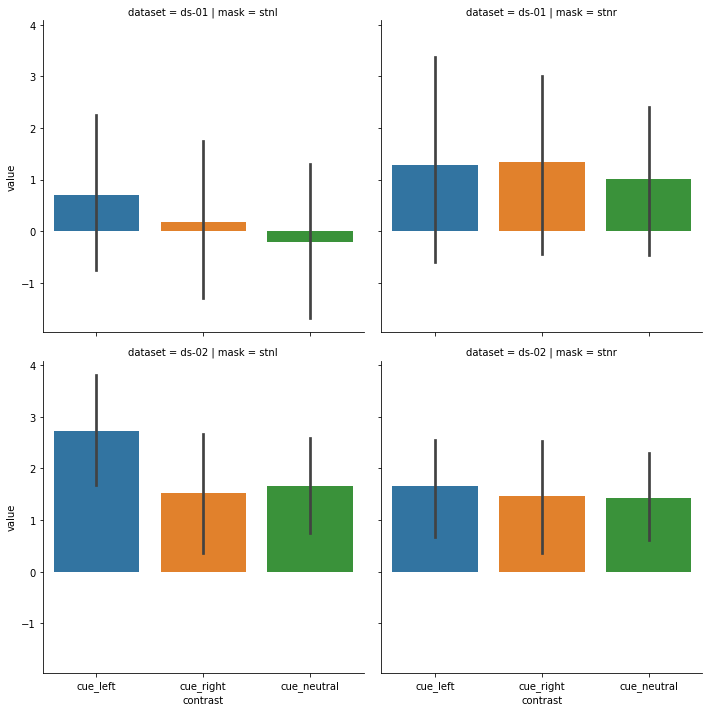

In [169]:
sns.factorplot('contrast', 'value', col='mask', row='dataset', data=results[results.contrast.isin(['cue_left', 'cue_right', 'cue_neutral'])], kind='bar', ci=67)

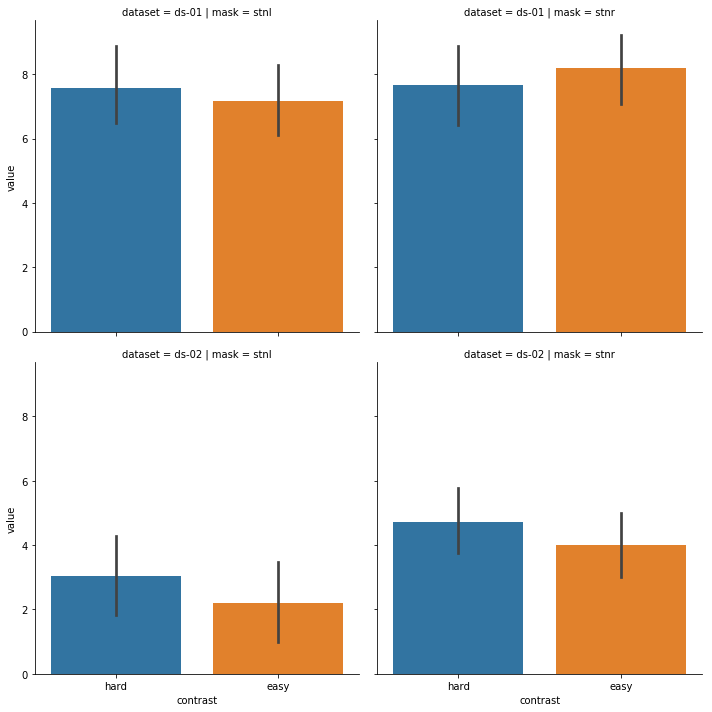

In [170]:
sns.factorplot('contrast', 'value', col='mask', row='dataset', data=results[results.contrast.isin(['easy', 'hard'])], kind='bar', ci=67)

In [171]:
pars = pd.read_pickle('/data/bias_task/derivatives/all_subjectwise_parameters.pkl')

In [172]:
results['subject'] = results.subject.apply(lambda d: d[-2:])

In [173]:
results = results.set_index(['dataset', 'subject'])

In [174]:
results_ = results.pivot_table(index=['dataset', 'subject'], columns=['mask', 'contrast'], values='value')

In [205]:
tmp = results_.merge(pars, left_index=True, right_index=True, )
tmp['stnl cue effect'] = tmp[('stnl', 'cue_right')] + tmp[('stnl', 'cue_left')] - 2*tmp[('stnl', 'cue_neutral')]
tmp['stnr cue effect'] = tmp[('stnr', 'cue_right')] + tmp[('stnr', 'cue_left')] - 2*tmp[('stnr', 'cue_neutral')]


tmp['stnl difficulty effect'] = tmp[('stnl', 'hard')] + tmp[('stnl', 'easy')]
tmp['stnr difficulty effect'] = tmp[('stnr', 'hard')] + tmp[('stnr', 'easy')]

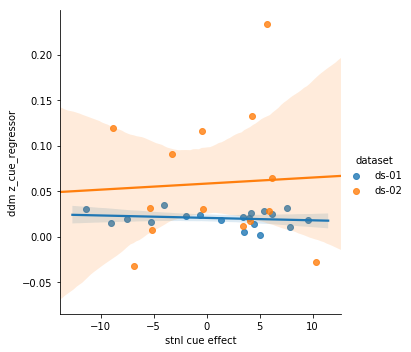

In [206]:
sns.lmplot('stnl cue effect', 'ddm z_cue_regressor', hue='dataset', data=tmp[['stnl cue effect', 'ddm z_cue_regressor']].reset_index())

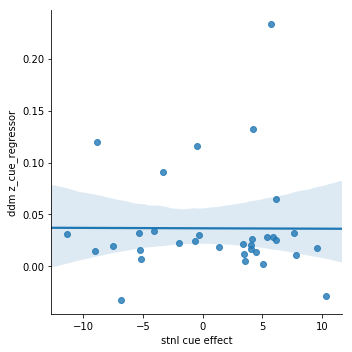

In [207]:
sns.lmplot('stnl cue effect', 'ddm z_cue_regressor', data=tmp[['stnl cue effect', 'ddm z_cue_regressor']].reset_index())

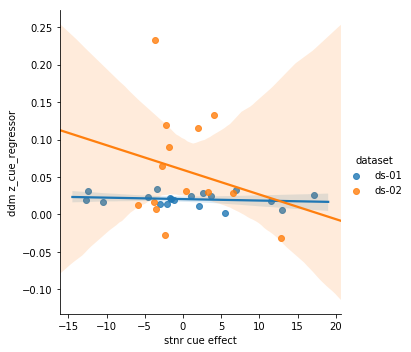

In [202]:
sns.lmplot('stnr cue effect', 'ddm z_cue_regressor', hue='dataset', data=tmp[['stnr cue effect', 'ddm z_cue_regressor']].reset_index())

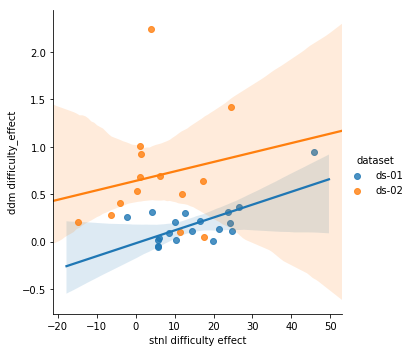

In [209]:
sns.lmplot('stnl difficulty effect', 'ddm difficulty_effect', hue='dataset', data=tmp[['stnl difficulty effect', 'ddm difficulty_effect']].reset_index())

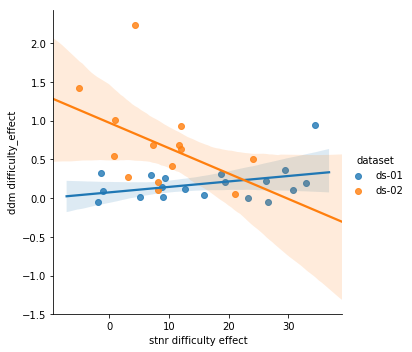

In [208]:
sns.lmplot('stnr difficulty effect', 'ddm difficulty_effect', hue='dataset', data=tmp[['stnr difficulty effect', 'ddm difficulty_effect']].reset_index())

# Left versus right

In [85]:
from scipy import stats as ss

In [86]:
c = results.pivot_table(index=['dataset', 'subject'], columns=['contrast', 'mask'], values='value')

In [87]:
ss.ttest_rel(c['cue_left'], c['cue_right'])

Ttest_relResult(statistic=array([0.94950437, 0.64096864]), pvalue=array([0.34948056, 0.52610725]))

In [88]:
ss.ttest_rel(c.loc['ds-01','hard'], c.loc['ds-01','easy'])


ss.ttest_rel(c.loc['ds-02','hard'], c.loc['ds-02','easy'])

Ttest_relResult(statistic=array([-0.17503055, -0.33934186]), pvalue=array([0.86375231, 0.73977155]))

In [90]:
results = []

contrasts = ['response_left', 'response_right']
for (subject, run), e in events.groupby(['subject', 'run']):
    
    c = confounds.loc[(subject, run), include_confounds]
    c = c.fillna(method='bfill')
    
    
    e = e[e.trial_type.isin(contrasts)]
    e['duration'] = 1.
    frame_times = df.loc[subject, run].index.get_level_values('frame') * 3
    X = make_first_level_design_matrix(frame_times, e, drift_order=None, drift_model=None, add_regs=c.values, add_reg_names=include_confounds,
                                      hrf_model='glover')
    
    labels, estimates = run_glm(df.loc[subject, run].values, X.values)
    
    contrast_matrix = np.eye(X.shape[1])
    basic_contrasts = dict([(column, contrast_matrix[i]) for i, column in enumerate(X.columns)])
    
#     r = sm.OLS(df.loc[(subject, run), 'stnr'].values, X).fit()
    
    for contrast in contrasts:
        d = dict(zip(df.columns, compute_contrast(labels, estimates, basic_contrasts[contrast], contrast_type='t').effect_size()))
        d['subject'] = subject
        d['run'] = run
        d['contrast'] = contrast        
        results.append(d)


/Users/gilles/miniconda3/envs/nideconv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [91]:
results = pd.DataFrame(results)
results = results.melt(id_vars=['subject', 'run', 'contrast'], var_name='mask')

In [92]:
results['dataset'] = results.subject.apply(lambda row: row[:5])

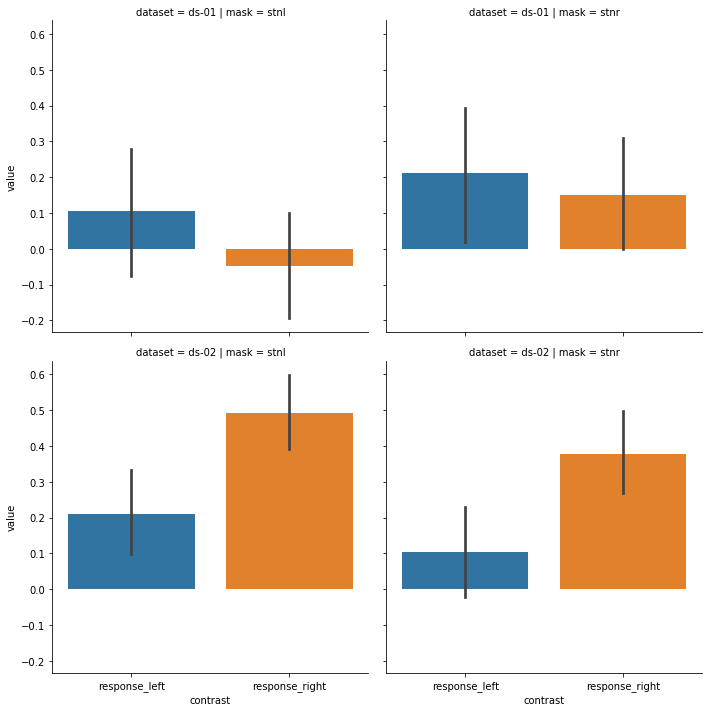

In [93]:
sns.factorplot('contrast', 'value', col='mask', row='dataset', data=results, kind='bar', ci=67)

In [94]:
c = results.pivot_table(index='subject', columns=['contrast', 'mask'], values='value')

In [95]:
import scipy.stats as ss

In [96]:
c.head()

contrast response_left           response_right          
mask              stnl      stnr           stnl      stnr
subject                                                  
ds-01.01     -0.028234  0.237341      -0.028469  0.142055
ds-01.02     -0.570455 -0.526713      -0.293025 -0.569118
ds-01.03     -0.423046 -0.490753      -0.831697 -0.591603
ds-01.04      1.287759  0.204072       1.030807 -0.050585
ds-01.05     -0.644179  0.430937       0.003716  0.685632

In [97]:
ss.ttest_rel(c['response_left'], c['response_right'])

Ttest_relResult(statistic=array([-0.41468529, -0.75083063]), pvalue=array([0.68113928, 0.45824067]))

In [98]:
import pandas as pd

contrast response_left           response_right          
mask              stnl      stnr           stnl      stnr
subject                                                  
ds-01.01     -0.028234  0.237341      -0.028469  0.142055
ds-01.02     -0.570455 -0.526713      -0.293025 -0.569118
ds-01.03     -0.423046 -0.490753      -0.831697 -0.591603
ds-01.04      1.287759  0.204072       1.030807 -0.050585
ds-01.05     -0.644179  0.430937       0.003716  0.685632
ds-01.06     -0.479666 -0.123377      -0.554157 -0.094521
ds-01.07     -1.192130 -0.762724      -1.000050 -0.446109
ds-01.08     -0.360991  0.578940      -0.974989 -0.069260
ds-01.09      0.639520  0.065906       0.160115 -0.298635
ds-01.10      0.100986 -0.051449      -0.199607 -0.509168
ds-01.11      0.132267 -0.494705      -0.490468 -0.198170
ds-01.12     -0.506077 -0.150922      -0.478451 -0.462224
ds-01.13      0.072781 -0.829801      -0.891770 -0.852543
ds-01.14     -0.396319 -0.873156      -0.356325 -0.092886
ds-01.15      4.131338  5.199416       2.275925  3.915737
ds-01.16      1.130043  1.052978       1.537700  1.287287
ds-01.17     -0.129526  0.260095       0.450346  0.345733
ds-01.18     -1.069183 -0.050100      -0.456067  0.495091
ds-01.19      0.125373  0.230017       0.011057  0.153542
ds-02.01      0.110521 -0.166655       0.709986 -0.294558
ds-02.02      0.376627  0.564970       0.511665  0.583562
ds-02.03      1.087380  0.369171       0.970326  0.662758
ds-02.05      0.005788 -0.234458       0.028023 -0.034920
ds-02.06      0.249984 -0.607135       0.598773 -0.446770
ds-02.07     -1.458576 -0.710727       0.082337 -0.116506
ds-02.08     -0.069178  0.231093      -0.192339  0.162479
ds-02.09      1.042113  0.846331       1.023134  0.574078
ds-02.10      0.122837  0.445075       0.104148  0.177420
ds-02.11      0.110696  0.530981      -0.047484  0.495381
ds-02.12     -0.570430 -1.274610       0.703699  1.792573
ds-02.13      0.337444  0.097465       0.510717  0.504169
ds-02.14      0.694600  0.975255       1.345332  1.043032
ds-02.15      0.350525  0.103333       0.410612  0.019279